# **Bank campaign**
## Exploratory Data Analysis

Carlos Garavito
***

In [73]:
# import packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# set no limit to raw display with pandas
pd.set_option('display.max_rows', None)

# define working paths
PROJECT_PATH = os.getcwd()
RAWDATA_PATH = os.path.join(PROJECT_PATH, os.pardir, 'data', 'raw')
INTERIM_PATH = os.path.join(PROJECT_PATH, os.pardir, 'data', 'interim')

In [74]:
# read raw data
file_1 = os.path.join(RAWDATA_PATH, "Bank_Campaign.csv")
df_raw_data = pd.read_csv(file_1,  sep = ";")


## General overview
***

In [75]:
# check head of data set
df_raw_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [76]:
# chek for quantity rows and columns of data set
df_raw_data_shape = df_raw_data.shape

print(f"This data set contains {df_raw_data_shape[0]} rows and {df_raw_data_shape[1]} columns.")

This data set contains 41188 rows and 21 columns.


In [77]:
# check for columns 
df_raw_data_shape_columns = list(df_raw_data.columns)

print(f"The data set contains the following columns: \n{df_raw_data_shape_columns}")

The data set contains the following columns: 
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed']


**Note 1:** The target variable is `subscribed`

In [78]:
# Check if the data set is imbalanced
possitive_response = df_raw_data[df_raw_data['subscribed'] == 'yes']
negative_response = df_raw_data[df_raw_data['subscribed'] == 'no']

print ("Possitive: %i (%.1f%%)"%(len(possitive_response), float(len(possitive_response))/len(df_raw_data)*100.0))
print ("Negative: %i (%.1f%%)"%(len(negative_response), float(len(negative_response))/len(df_raw_data)*100.0))
print ("Total sample: %i"%len(df_raw_data))

## Note
# Data set is imbalaced!

Possitive: 4639 (11.3%)
Negative: 36546 (88.7%)
Total sample: 41188


**Note 2:** The data set is imbalanced. 

To evaluate models, use following metrics: 
- Marco F1 score 
- AUC score (AUC ROC) 
- Average precision score (AP)
- G-Mean

In [79]:
# identify null values by percentage
missing_values = df_raw_data.isnull()
missing_values.sum() / len(df_raw_data)

age               0.000000
job               0.000000
marital           0.000000
education         0.000000
default           0.000000
housing           0.000000
loan              0.000000
contact           0.000000
month             0.000000
day_of_week       0.000000
duration          0.000000
campaign          0.000000
pdays             0.000000
previous          0.000000
poutcome          0.000000
emp.var.rate      0.000000
cons.price.idx    0.000000
cons.conf.idx     0.000000
euribor3m         0.000000
nr.employed       0.000000
subscribed        0.000073
dtype: float64

**Note 3**: There are no null values. Last three registers are null due to evaluation purposes.

In [80]:
df_raw_data.tail(3).to_csv(os.path.join(RAWDATA_PATH, "Bank_Campaign_3_registers.csv"), index = False)

# select only working data without last 3 null registers
df_raw_data = df_raw_data[~df_raw_data['subscribed'].isnull()]
df_raw_data.tail(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


## Univariate analysis
***

In [81]:
list_client_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'subscribed']
list_current_camp_features = ['contact', 'month', 'day_of_week', 'duration', 'subscribed']
list_other_current_camp_features = ['campaign', 'pdays', 'previous', 'poutcome', 'subscribed']
list_social_economic_features = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed']

### Client features

Client features dictionary data: 
- age (numeric)
- job : type of job (categorical: ‘admin.’,’blue-collar’,’entrepreneur’,’housemaid’,’management’,’retired’,’self-employed’,’services’,’student’,’technician’,’unemployed’,’unknown’)
- marital : marital status (categorical: ‘divorced’,’married’,’single’,’unknown’; note: ‘divorced’ means divorced or widowed)
- education (categorical: ‘basic.4y’,’basic.6y’,’basic.9y’,’high.school’,’illiterate’,’professional.course’,’university.degree’,’unknown’)
- default: has credit in default? (categorical: ‘no’,’yes’,’unknown’)
- housing: has housing loan? (categorical: ‘no’,’yes’,’unknown’)
- loan: has personal loan? (categorical: ‘no’,’yes’,’unknown’)

In [82]:
df_raw_data[list_client_features].head()

,age,job,marital,education,default,housing,loan,subscribed
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no


<AxesSubplot:title={'center':'Boxplot - Age'}, xlabel='subscribed', ylabel='age'>

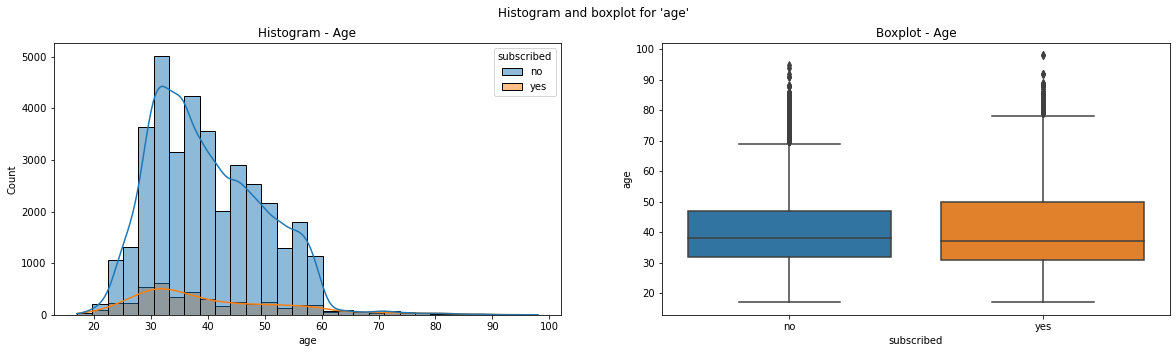

In [83]:
# age histogram and boxplot
fig, axes = plt.subplots(1,2, figsize=(20, 5))
fig.suptitle('Histogram and boxplot for \'age\'')
axes[0].set_title("Histogram - Age")
axes[1].set_title("Boxplot - Age")
sns.histplot(data=df_raw_data, x="age", kde=True, hue='subscribed', bins = 30, ax=axes[0])
sns.boxplot(x = 'subscribed', y = 'age', data = df_raw_data, ax=axes[1])

<Figure size 432x288 with 0 Axes>

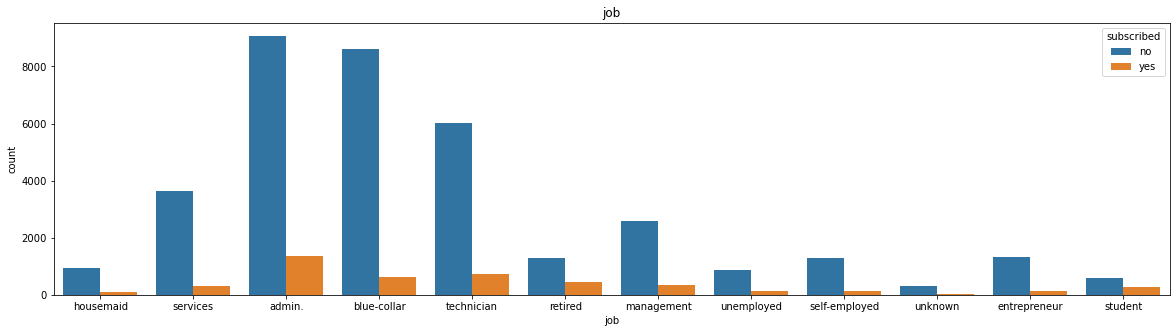

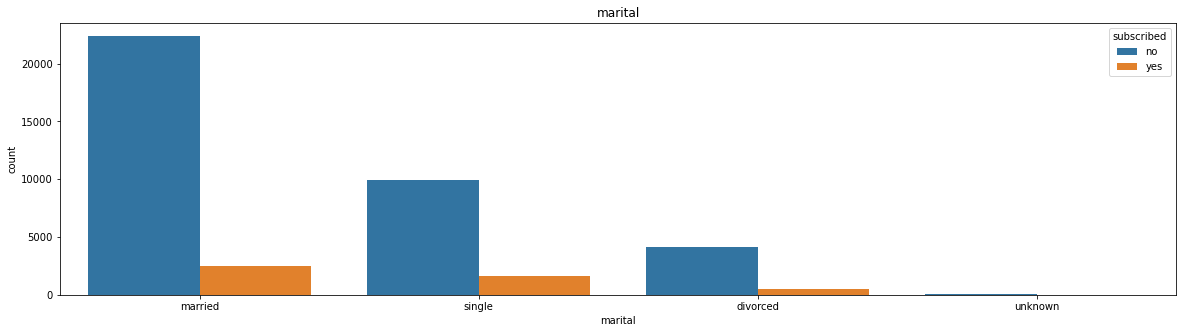

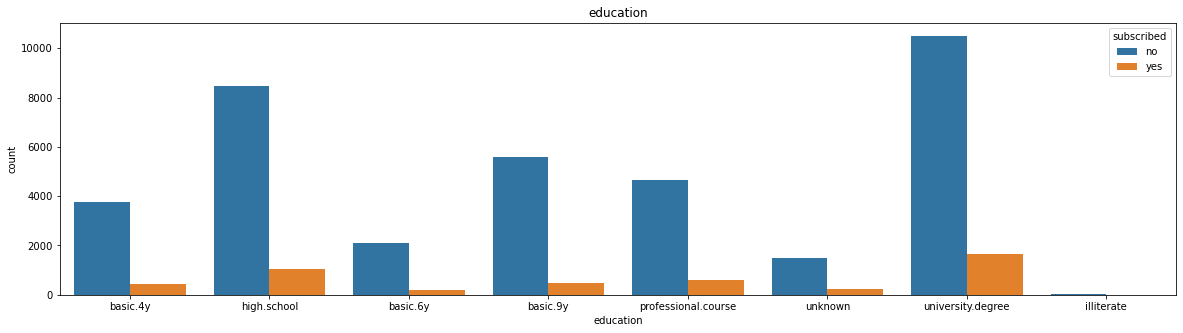

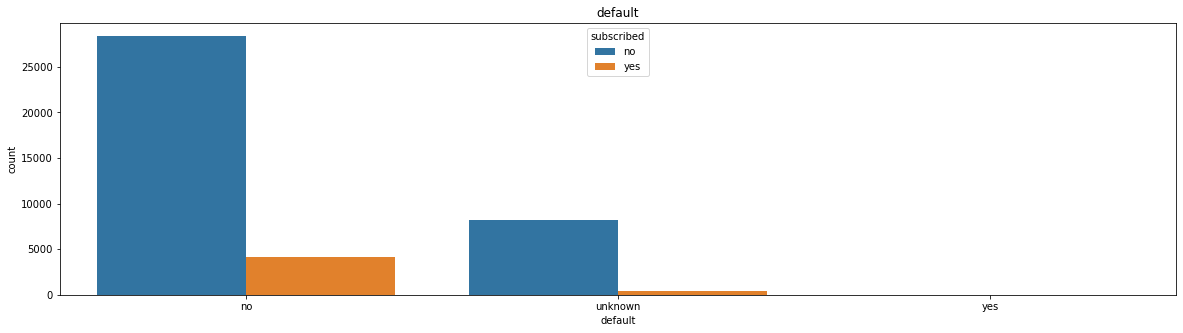

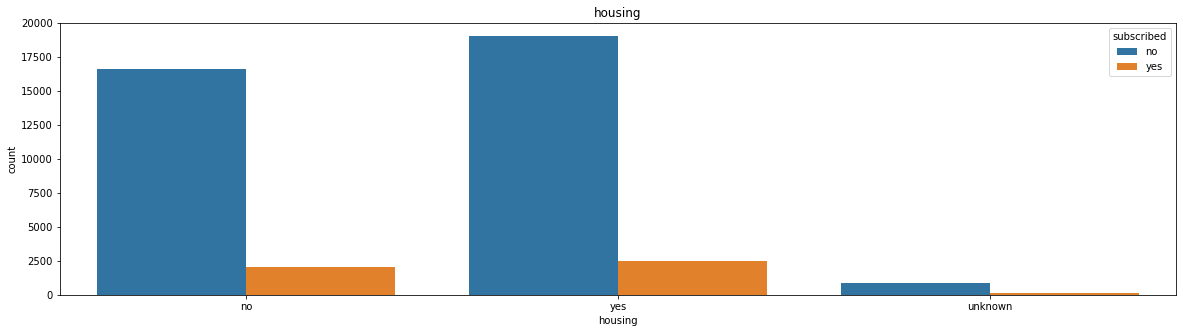

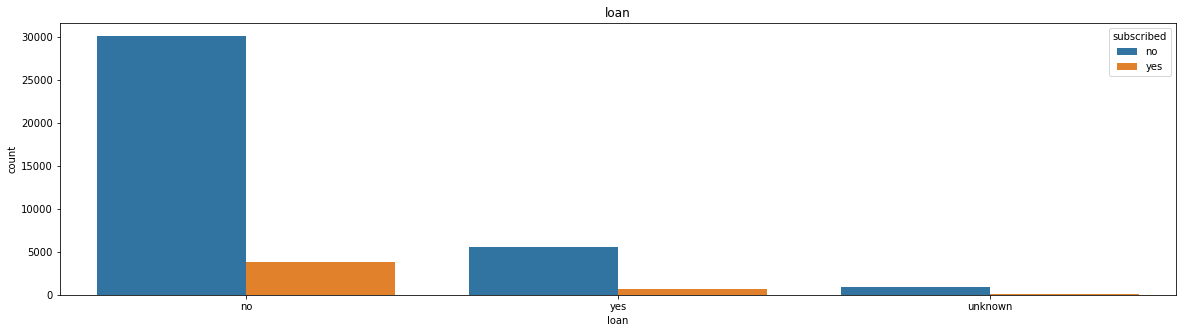

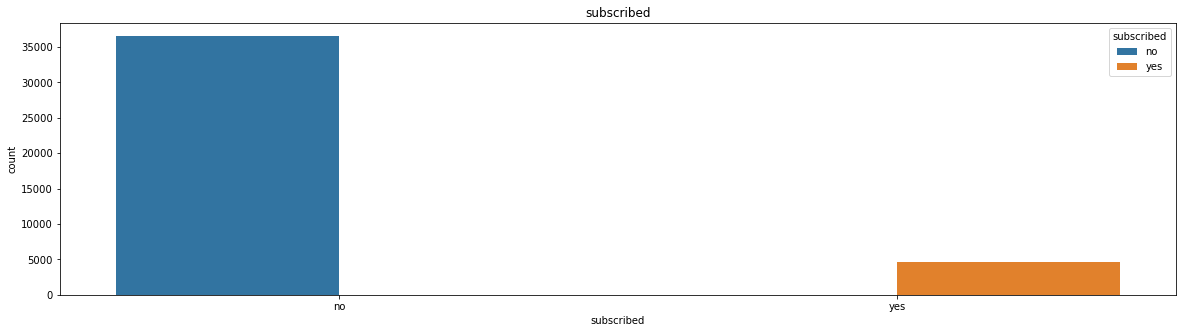

In [84]:
# count for categorical features
for i, field in enumerate(list_client_features):
    if field == 'age': 
        continue
    plt.figure(i)
    plt.figure(figsize=(20,5))
    plt.title(field)
    sns.countplot(x=field, data=df_raw_data, hue = 'subscribed')

    

### Current campaign

Current campaing dictionary data:
- contact: contact communication type (categorical: ‘cellular’,’telephone’)
- month: last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)
- day_of_week: last contact day of the week (categorical: ‘mon’,’tue’,’wed’,’thu’,’fri’)
- duration: last contact duration, in seconds (numeric).

In [85]:
df_raw_data[list_current_camp_features].head()

,contact,month,day_of_week,duration,subscribed
0,telephone,may,mon,261,no
1,telephone,may,mon,149,no
2,telephone,may,mon,226,no
3,telephone,may,mon,151,no
4,telephone,may,mon,307,no


<AxesSubplot:title={'center':'Boxplot - Duration'}, xlabel='subscribed', ylabel='duration'>

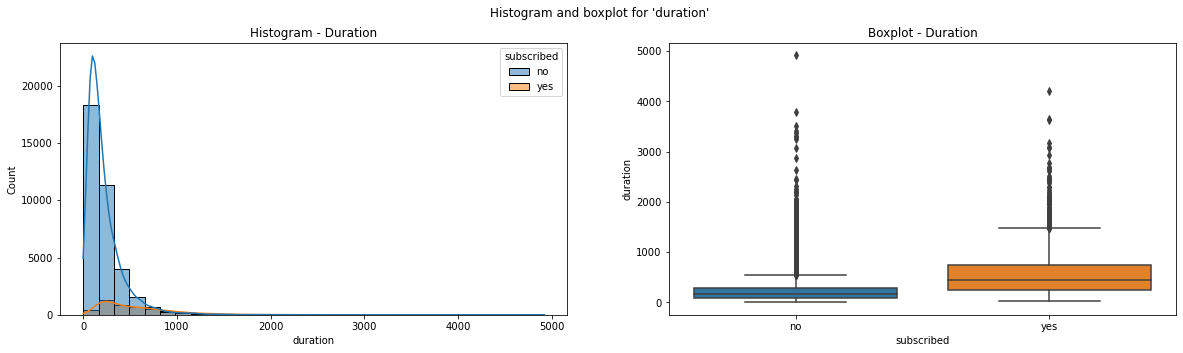

In [86]:
# duration - histogram and boxplot
fig, axes = plt.subplots(1,2, figsize=(20, 5))
fig.suptitle('Histogram and boxplot for \'duration\'')
axes[0].set_title("Histogram - Duration")
axes[1].set_title("Boxplot - Duration")
sns.histplot(data=df_raw_data, x="duration", kde=True, hue='subscribed', bins = 30, ax=axes[0])
sns.boxplot(x = 'subscribed', y = 'duration', data = df_raw_data, ax=axes[1])

<Figure size 432x288 with 0 Axes>

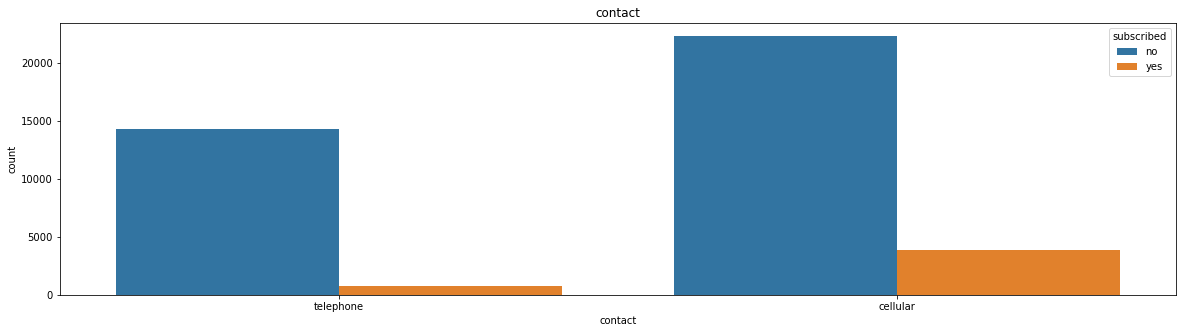

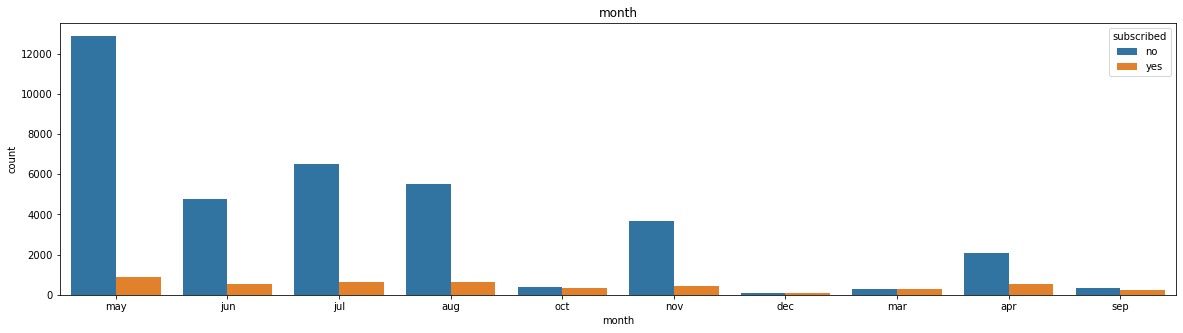

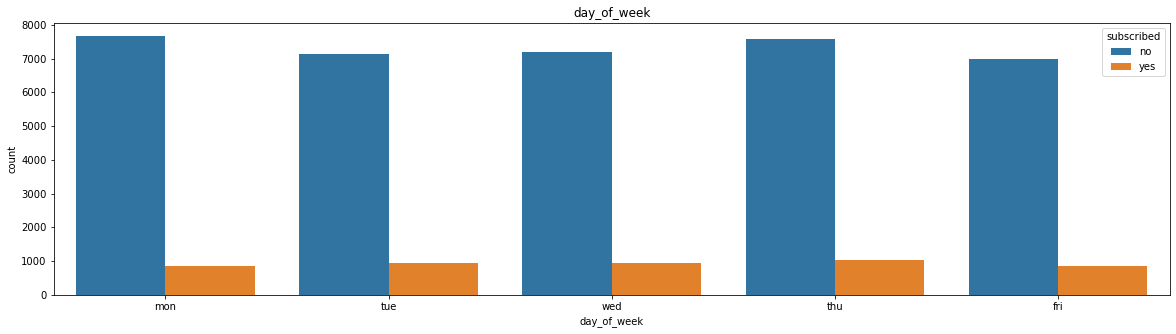

In [87]:
# count for categorical features
for i, field in enumerate(list_current_camp_features):
    if field == 'duration' or field == 'subscribed': 
        continue
    plt.figure(i)
    plt.figure(figsize=(20,5))
    plt.title(field)
    sns.countplot(x=field, data=df_raw_data, hue = 'subscribed')

### Other features from current campaign

Other features from current campaign dictionary data:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: ‘failure’,’nonexistent’,’success’)

In [88]:
df_raw_data[list_other_current_camp_features].head()

,campaign,pdays,previous,poutcome,subscribed
0,1,999,0,nonexistent,no
1,1,999,0,nonexistent,no
2,1,999,0,nonexistent,no
3,1,999,0,nonexistent,no
4,1,999,0,nonexistent,no


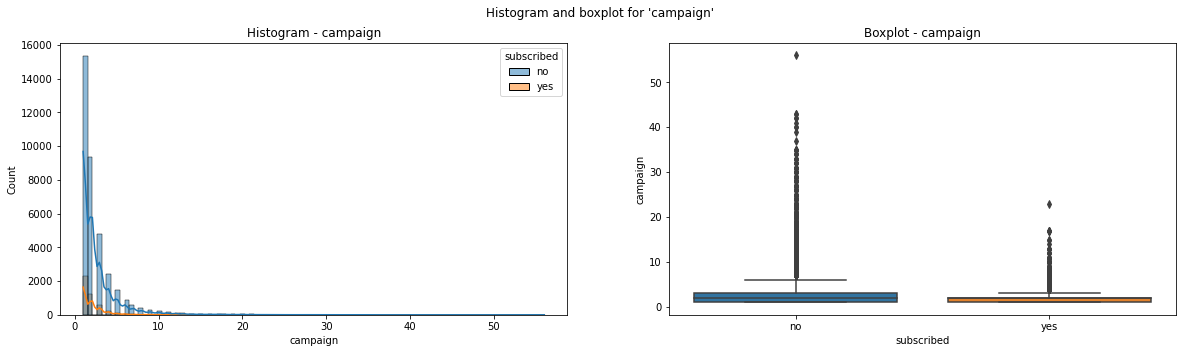

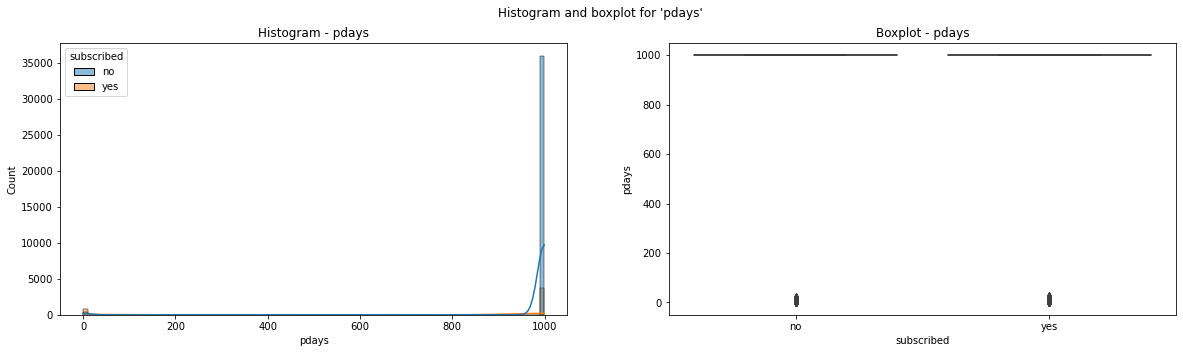

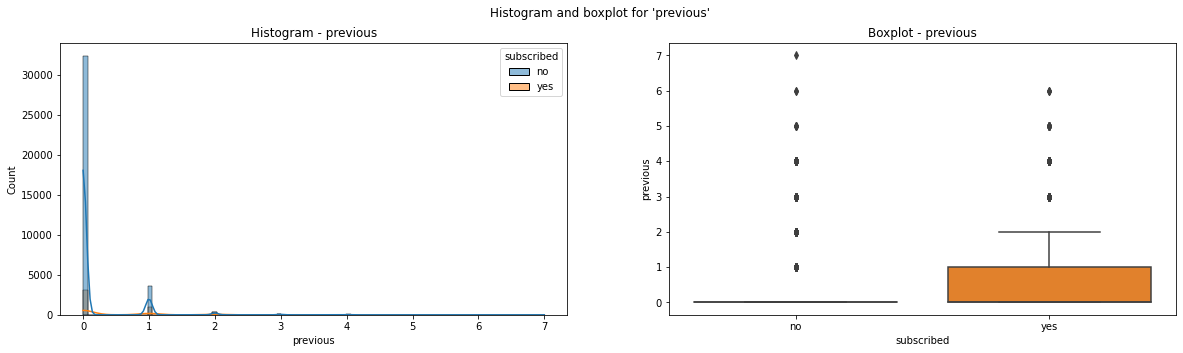

In [89]:
# count for categorical features
for i, field in enumerate(list_other_current_camp_features):
    if field == 'subscribed' or field == 'poutcome': 
        continue
    fig, axes = plt.subplots(1,2, figsize=(20, 5))
    fig.suptitle(f'Histogram and boxplot for \'{field}\'')
    axes[0].set_title(f"Histogram - {field}")
    axes[1].set_title(f"Boxplot - {field}")
    sns.histplot(data=df_raw_data, x=field, kde=True, hue='subscribed', bins = 100, ax=axes[0])
    sns.boxplot(x = 'subscribed', y = field, data = df_raw_data, ax=axes[1])

<AxesSubplot:title={'center':'poutcome'}, xlabel='subscribed', ylabel='count'>

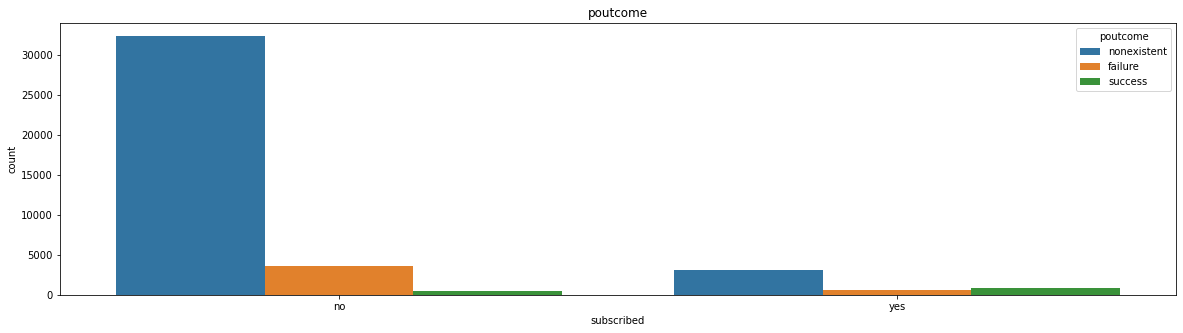

In [90]:
plt.figure(figsize=(20,5))
plt.title('poutcome')
sns.countplot(x=field, data=df_raw_data, hue = 'poutcome')

### Social and economics features

Social and economics festures dictionaty data:
- emp.var.rate: employment variation rate — quarterly indicator (numeric)
- cons.price.idx: consumer price index — monthly indicator (numeric)
- cons.conf.idx: consumer confidence index — monthly indicator (numeric)
- euribor3m: euribor 3 month rate — daily indicator (numeric)
- nr.employed: number of employees — quarterly indicator (numeric)

**Asumption 1:** Euribor 3 months, is given in percentage with three significant units after decimal point. The data shows some registers greater than $600$ that can affect considerable the statistical descriptors. The reason of the error could be due to conding and import data issues. 

Nomal values for this metric can be observed in [euribor site](https://www.euribor-rates.eu/en/current-euribor-rates/2/euribor-rate-3-months/).

In [91]:
print ("Wrong registers - euribor3m: %i (%.1f%%)"%(len(df_raw_data[df_raw_data["euribor3m"]>500]), float(len(df_raw_data[df_raw_data["euribor3m"]>500]))/len(df_raw_data)*100.0))

Wrong registers - euribor3m: 3561 (8.6%)


<AxesSubplot:title={'center':'euribor3m histogram before correction'}>

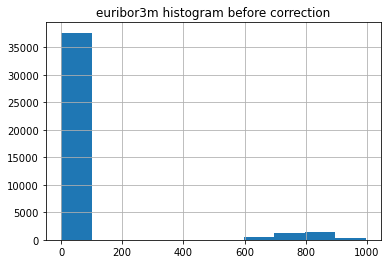

In [92]:
plt.title("euribor3m histogram before correction")
df_raw_data["euribor3m"].hist()

<AxesSubplot:title={'center':'euribor3m histogram after correction'}>

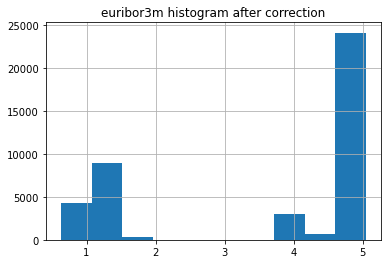

In [93]:
# corrects error of import data. why to divide by 1000?
df_raw_data["euribor3m"] = df_raw_data["euribor3m"].apply(lambda x: x/1000 if x>500 else x)

plt.title("euribor3m histogram after correction")
df_raw_data["euribor3m"].hist()

Note that the range of the values is different, in such a way that the maximum value is close to $5$ and not to $1000$ as the case before doing the correction. 

In [94]:
df_raw_data[list_social_economic_features].sample(5)

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
10959,1.4,94.465,-41.8,4.962,5228.1,no
4707,1.1,93.994,-36.4,4.858,5191.0,no
17589,1.4,93.918,-42.7,4.962,5228.1,no
26644,-0.1,93.200,-42.0,4.076,5195.8,no
15036,1.4,93.918,-42.7,4.958,5228.1,no


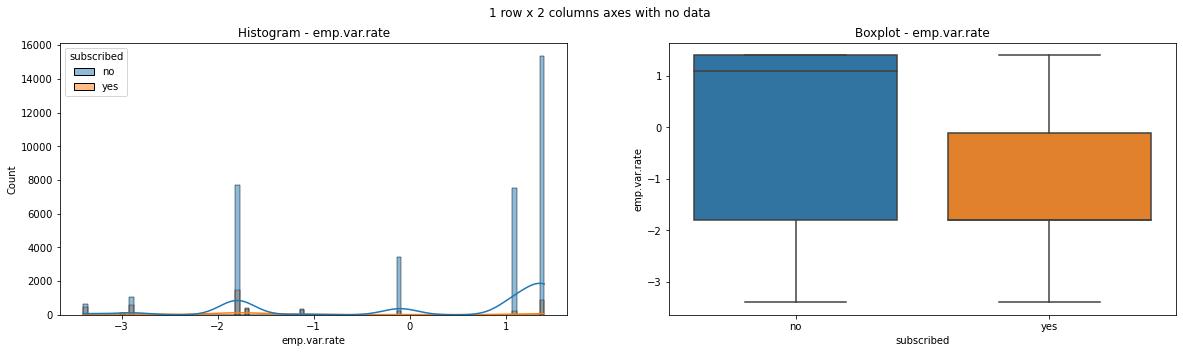

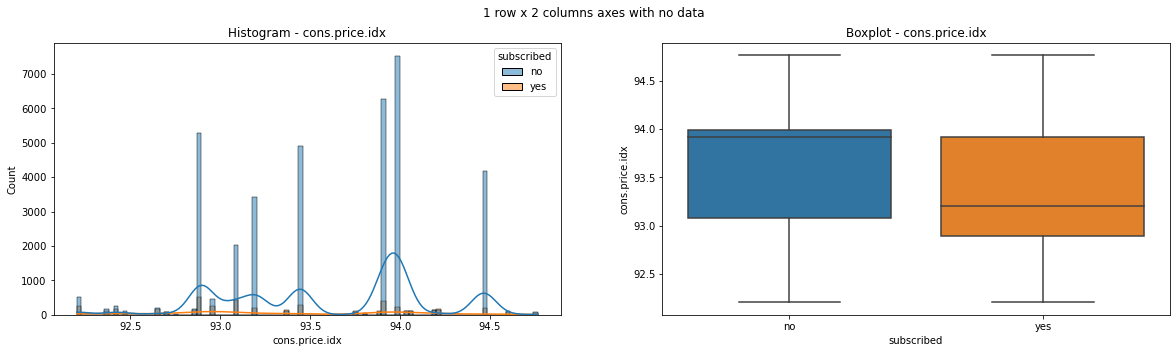

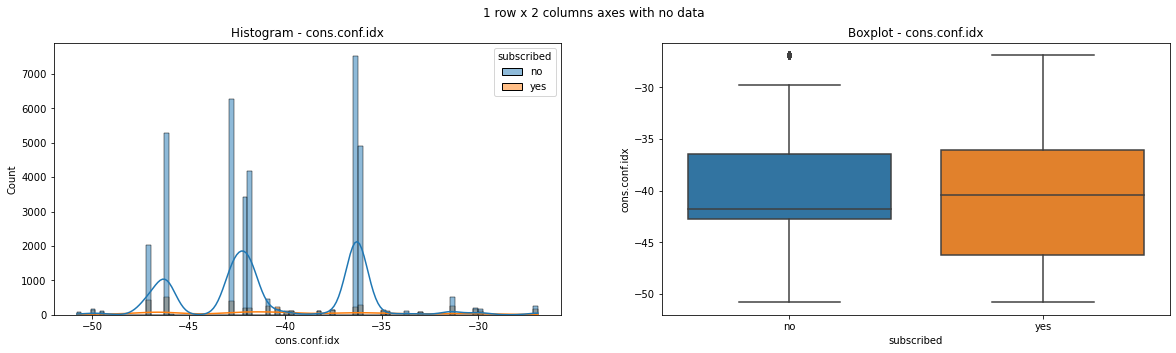

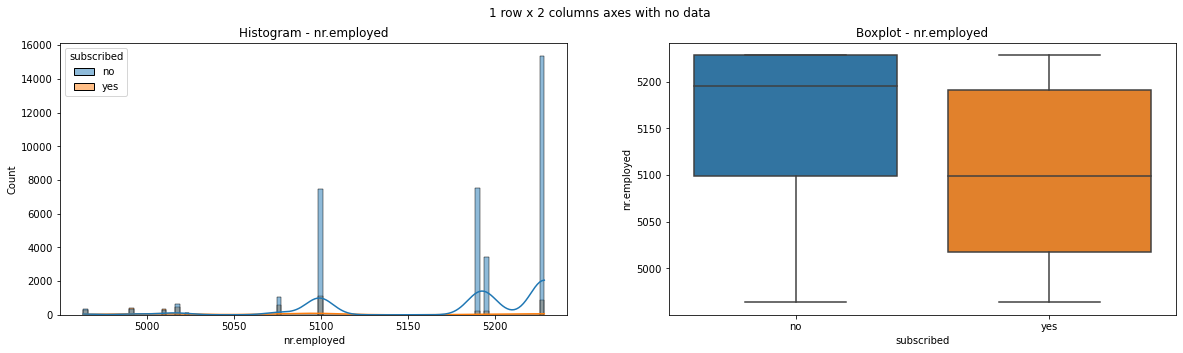

In [95]:
# count for categorical features
for i, field in enumerate(list_social_economic_features):
    if field == 'subscribed' or field == 'euribor3m': 
        continue
    fig, axes = plt.subplots(1,2, figsize=(20, 5))
    fig.suptitle('1 row x 2 columns axes with no data')
    axes[0].set_title(f"Histogram - {field}")
    axes[1].set_title(f"Boxplot - {field}")
    sns.histplot(data=df_raw_data, x=field, kde=True, hue='subscribed', bins = 100, ax=axes[0])
    sns.boxplot(x = 'subscribed', y = field, data = df_raw_data, ax=axes[1])

## Correlation of numeric parameters

<AxesSubplot:>

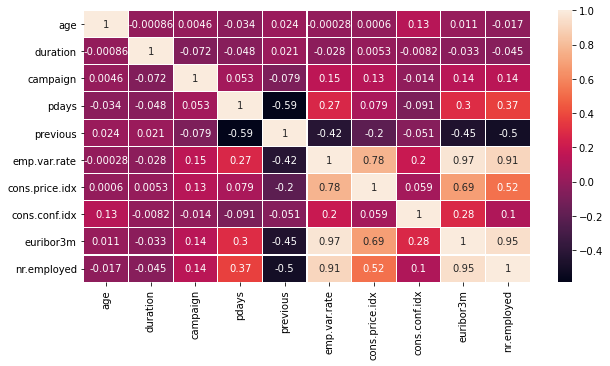

In [96]:
corr = df_raw_data.corr()
plt.figure(figsize=(10,5))

# check for correlation
sns.heatmap(corr, annot=True, linewidth=0.1)

## Drop high correlated variables

<AxesSubplot:>

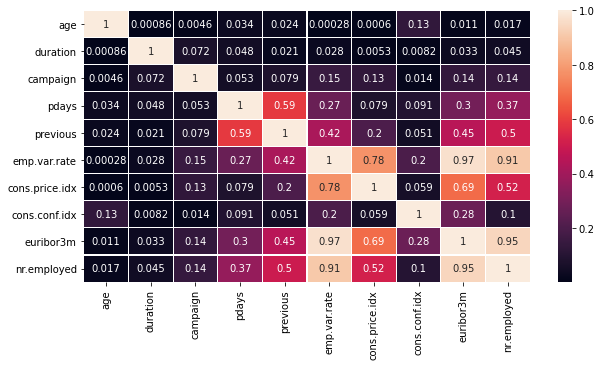

In [97]:
# check for absolute correlation
plt.figure(figsize=(10,5))
sns.heatmap(corr.abs(), annot=True, linewidth=0.1)

<AxesSubplot:>

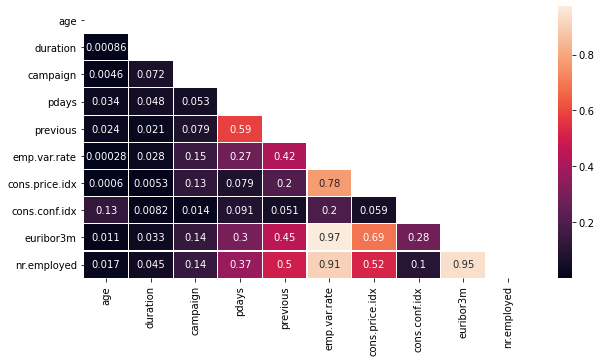

In [98]:
# create a correlation triangle
plt.figure(figsize=(10,5))
corr_triangle = corr.where(np.tril(np.ones(corr.shape),k=-1).astype(np.bool_)).abs()
sns.heatmap(corr_triangle, annot=True, linewidth=0.1)


Drop candidates:
- **emp.var.rate** correlated with nr.employed, euribor3m, cons.price.idx
- **nr.employed** correlated with previous, emp.var.rate, cons.price.idx, euribor3m
- **cons.price.idx** correlated with nr.employed, euribor3m, emp.var.rate


<AxesSubplot:>

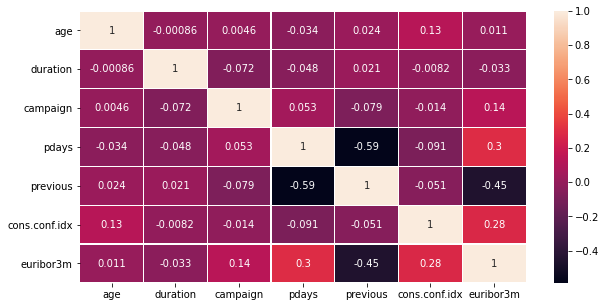

In [99]:
corr = df_raw_data.drop(columns=["emp.var.rate", "nr.employed", "cons.price.idx"]).corr()
plt.figure(figsize=(10,5))

# check for correlation
sns.heatmap(corr, annot=True, linewidth=0.1)

In [100]:
# drop correlated features
df_raw_data = df_raw_data.drop(columns=["emp.var.rate", "nr.employed", "cons.price.idx"])

## Saving pre-processed data set

In [101]:
df_raw_data.to_csv(os.path.join(INTERIM_PATH, 'bank_campaign_v2.csv'), index=False)

## EDA overview
***

1. This data set contains $41188$ rows and $21$ columns.

2. Data set is imbalanced for target variable. 
    Note that: 
    Possitive response: $4639$ - $(11.3%)$
    Negative response: $36546$ - $(88.7%)$
    Total sample: $41188$
    Thus, metrics to evaluate ML models must be selected that take into account imbalanced data. Suggested metrics are: 

    - weighted F1 score 
    - AUC score (AUC ROC) 
    - Average precision score (AP)
    - G-Mean

2. Data set fields are divided into three groups: 
    
    a. Client features
    - age: Clientes range age is from $(30 - 50)$ years old
    - job: Top tree subscripted clients are 'admin', 'blue-collar' and 'technician'.
    - marital: most subscripted clients are married. 
    - education: most subscripted clients has an university degree, followed by high school degree. 
    - default: most subscripted clients are not in default. 
    - housing: housing loan is not quite different for subscipted or unsubscripted clients. However, there are more clients subscripted who has housing loans. 

    b. Current campaign features
    - duration: clients subscripted tends to have more seconds duration during calls. 
    - contact: clients contacted through cellular are more subscribed
    - month: the month where are more subscriptions is may, the month where are less is dec. Thus, there is a temporality impact to evaluate. 
    - day of week: susbscriptions over day of the week are similar for all days. There is no temporality on days of the week. 
    
    c. Other features from current campaing
    - campaign: there are a high quantity of clients that were not contacted in this company. No contacted clients tend to not subscribe to the campaign. Thus, is important to take this feature into account for the model because is going to impact the prediction value. 
    - pdays: the major of clients has not be contacted by previous campaigns. 
    - previous: clients previously contacted due past campaigns, tends the more to subscribe.
    - poutcome: there are a population of new clients that can be laverage. If the outcome is nonexistant, is due that client has not be contacted previosly and the reason could be that is because is a new client.  

    d. Social and economics features
    - emp.var.rate: subscribed clients are in range $((-2) - 0)$
    - cons.price.idx: is similar for subscribed and non subscribed clients. Are in range $(93-94)$
    - nr.employed: subscribed clients are in range $(5050-5200)$, approx.

3. Correlated numerical features: Following variables must be not taking into account for modeling, due its high correlation and to avoid multicollinearity. 
    - ´emp.var.rate´, 
    - ´nr.employed´
    - ´cons.price.idx´

4. The data set has not null values.  